# Jurnal Modul 2

### Samsul Rizal (F1D02310025)

In [19]:
import cv2
import numpy as np
import matplotlib.pylab as plt

Code di atas digunakan untuk mengimport library-library, yaitu:
1. cv2 yang digunakan untuk melakukan manipulasi citra. Dalam kasus ini, cv2 hanya digunakan untuk mengkonversi citra RGB (3 layer) menjadi grayscale (1 layer).
2. numpy yang digunakan untuk manipulasi array. Numpy diimport sebagai np untuk memudahkan penggunaannya agar tidak perlu mengetikkan numpy, cukup np ketika ingin digunakan.
3. matplotlib.pylab yang digunakan  untuk membuat grafik, membaca gambar, dan menampilkan gambar. Di sini diimport sebagai plt untuk memudahkan penggunaan.

Code di bawah digunakan untuk membaca gambar aktivitas menggunakan fungsi imread yang akan disimpan di variabel img. Kemudian img ditampilkan dengan cmap gray untuk memberi tahu bahwa gambar yang mau ditampilkan adalah gambar grayscale.

(np.float64(-0.5), np.float64(2721.5), np.float64(1293.5), np.float64(-0.5))

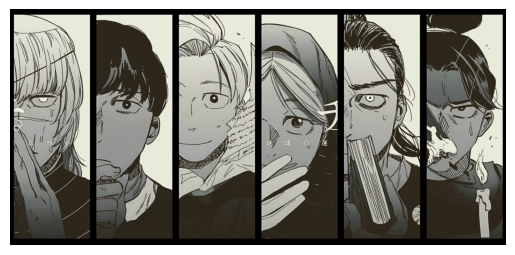

In [22]:
img = plt.imread('../assets/aktivis.jpg')
plt.imshow(img, cmap='gray')
plt.axis('off')

### Fungsi `terurut(img, indeks_urutan)` 

In [23]:
def terurut(img, indeks_urutan):
    h, w = img.shape
    lebar = w // 6
    
    bagian = [0] * 6
    for i in range(6):
        bagian_baru = np.zeros((h, lebar), dtype=np.uint8)
        for j in range(h):
            for k in range(lebar):
                bagian_baru[j, k] = img[j, i * lebar + k]
        bagian[i] = bagian_baru

    urutan = [0] * 6
    for i in range(6):
        indeks_asli = indeks_urutan[i]
        urutan[i] = bagian[indeks_asli]

    img_terurut = np.zeros((h, lebar * 6), dtype=np.uint8)
    for i in range(6):
        kolom_awal = i * lebar
        kolom_akhir = (i + 1) * lebar
        img_terurut[:, kolom_awal:kolom_akhir] = urutan[i]

    return img_terurut


code di atas adalah Fungsi terurut yang membagi gambar menjadi 6 bagian sama besar, lalu menyusun ulang bagian-bagian itu sesuai dengan urutan yang diberikan oleh indeks_urutan. Pertama, gambar dipotong-potong menjadi 6 kolom kecil. Lalu, bagian-bagian ini diatur ulang berdasarkan indeks yang diminta. Setelah itu, semua bagian yang sudah tersusun digabung lagi menjadi satu gambar utuh dan hasil akhirnya dikembalikan.

code dibawah ini membaca gambar aktivis.jpg dalam mode grayscale, lalu mengacak urutan 6 bagian gambar sesuai urutan_bagian. Setelah itu, gambar yang sudah disusun ulang ditampilkan dengan matplotlib tanpa menampilkan sumbu.

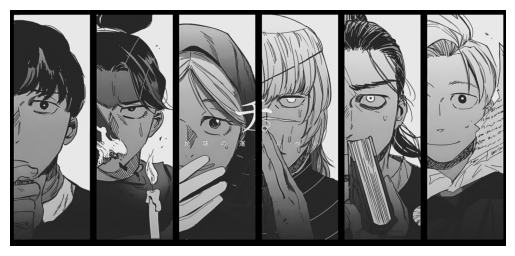

In [24]:
img = cv2.imread('../Assets/aktivis.jpg', cv2.IMREAD_GRAYSCALE)

urutan_bagian = [1, 5, 3, 0, 4, 2]
img_terurut = terurut(img, urutan_bagian)

plt.imshow(img_terurut, cmap='gray')
plt.axis('off')
plt.show()

In [4]:
def histogram(img):
    tinggi, lebar = img.shape
    hist = [0] * 256

    for i in range(tinggi):
        for j in range(lebar):
            nilai_piksel = img[i][j]
            hist[nilai_piksel] += 1
    
    return hist

### Fungsi Histogram
code di atas yaitu fungsi histogram menghitung banyaknya setiap nilai piksel (0–255). Ia mengecek semua piksel satu per satu dan mencatat berapa kali tiap nilai muncul, lalu hasilnya dikembalikan sebagai daftar.

In [5]:
def normalisasi(img):
    tinggi, lebar = img.shape
    N = tinggi * lebar
    L = 256

    hist = histogram(img)
    norm = [0.0] * L
    for i in range(L):
        norm[i] = hist[i] / N

    return norm

### Fungsi Normalisasi 
code di atas yaitu Fungsi normalisasi menghitung histogram gambar, lalu membagi setiap nilai histogram dengan jumlah total piksel supaya hasilnya jadi antara 0 sampai 1. Hasil akhirnya adalah daftar nilai normalisasi untuk tiap tingkat keabuan.

In [6]:
def cumulative(img):
    L = 256

    norm = normalisasi(img)
    cmltv = [0.0] * L
    cmltv[0] = norm[0]
    for i in range(1, L):
        cmltv[i] = cmltv[i - 1] + norm[i]
    return cmltv

### Fungsi Cumulatif 

code di atas yaitu Fungsi cumulative menghitung nilai kumulatif dari hasil normalisasi gambar. Ia menjumlahkan nilai normalisasi satu per satu dari awal sampai akhir, sehingga membentuk daftar baru berisi akumulasi peluang tiap tingkat keabuan.


In [7]:
def transformasi(img):
    L = 256

    cmltv = cumulative(img)
    trans = [0] * L
    for i in range(L):
        trans[i] = int(round(cmltv[i] * (L - 1)))

    return trans

### Fungsi Transformasi 

code di atas yaitu Fungsi transformasi membuat tabel baru untuk mentransformasikan nilai piksel gambar. Caranya dengan mengalikan hasil kumulatif dengan 255 (karena gambar 8-bit punya 256 tingkat warna) lalu dibulatkan. Hasil ini akan dipakai untuk meratakan (equalize) gambar.


In [8]:
def ekualisasi(img):
    tinggi, lebar = img.shape

    trans = transformasi(img)
    eq = [[0] * lebar for _ in range(tinggi)]
    for i in range(tinggi):
        for j in range(lebar):
            eq[i][j] = trans[img[i][j]]

    return eq


### Fungsi Ekualisasi
code di atas yaitu fungsi ekualisasi menerapkan hasil transformasi ke semua piksel gambar. Setiap nilai piksel lama diganti dengan nilai baru dari tabel transformasi, sehingga menghasilkan gambar yang kontrasnya lebih merata.

code bawah ini menerapkan ekualisasi pada gambar yang sudah diurutkan sebelumnya (img_terurut). Gambar yang sudah diubah (dalam bentuk list) kemudian dikonversi kembali menjadi array NumPy dengan tipe data uint8, lalu ditampilkan menggunakan matplotlib dalam mode hitam putih tanpa sumbu.

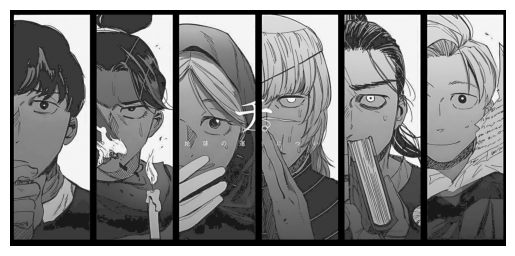

In [9]:
img_ekualisasi = ekualisasi(img_terurut)
img_ekualisasi = np.array(img_ekualisasi, dtype=np.uint8)

plt.imshow(img_ekualisasi, cmap='gray')
plt.axis('off')
plt.show()

In [10]:
def spesifikasi(img, target):
    L = 256

    img_cumulative = cumulative(img)
    target_cumulative = cumulative(target)

    mapping = [0] * L
    for i in range(L):
        selisih_min = abs(img_cumulative[i] - target_cumulative[0])
        nilai_mapping = 0
        for j in range(1, L):
            selisih = abs(img_cumulative[i] - target_cumulative[j])
            if selisih < selisih_min:
                selisih_min = selisih
                nilai_mapping = j
        mapping[i] = nilai_mapping

    tinggi, lebar = img.shape
    hasil = np.zeros_like(img, dtype=np.uint8)
    for y in range(tinggi):
        for x in range(lebar):
            piksel = img[y, x]
            hasil[y, x] = mapping[piksel]

    return hasil

code di atas adalah Fungsi spesifikasi melakukan proses untuk mengubah gambar agar distribusi intensitasnya mirip dengan gambar target. Pertama, fungsi menghitung nilai kumulatif untuk kedua gambar (gambar sumber dan target). Kemudian, untuk setiap nilai piksel dalam gambar sumber, fungsi mencari nilai kumulatif target yang paling mendekati dan memetakan nilai piksel sumber ke nilai yang sesuai di target. Setelah itu, gambar yang telah dimodifikasi dikembalikan sebagai hasilnya.

code di bawah ini membaca gambar target (propaganda.jpg) dalam mode gray dan kemudian menerapkan fungsi spesifikasi pada gambar yang sudah diurutkan (img_terurut) agar distribusi intensitasnya mirip dengan gambar target. Hasilnya adalah gambar yang distribusi intensitasnya lebih mirip dengan gambar target, lalu gambar tersebut ditampilkan menggunakan matplotlib tanpa sumbu.

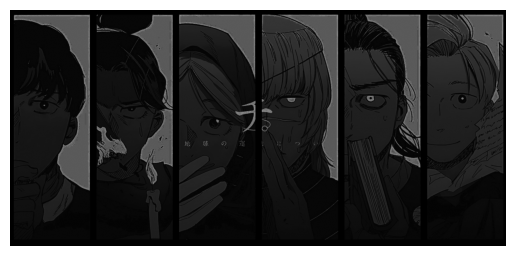

In [11]:
target_img = cv2.imread('../Assets/propaganda.jpg', cv2.IMREAD_GRAYSCALE)

hasil_propaganda = spesifikasi(img_terurut, target_img)

plt.imshow(hasil_propaganda, cmap='gray')
plt.axis('off')
plt.show()

code di bawah ini membaca gambar target baru (draka.jpg) dalam mode hitam putih, lalu menerapkan fungsi spesifikasi pada gambar yang sudah diurutkan (img_terurut). Tujuannya adalah agar distribusi intensitas gambar img_terurut menjadi mirip dengan gambar target (draka.jpg). Hasilnya adalah gambar yang intensitas warnanya disesuaikan dengan gambar target, kemudian ditampilkan tanpa sumbu menggunakan matplotlib.

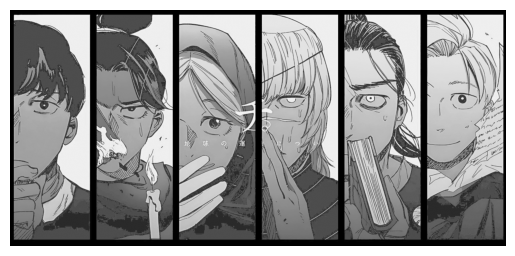

In [12]:
target_img = cv2.imread('../Assets/draka.jpg', cv2.IMREAD_GRAYSCALE)

hasil_draka = spesifikasi(img_terurut, target_img)

plt.imshow(hasil_draka, cmap='gray')
plt.axis('off')
plt.show()

In [13]:
def tabel_normalisasi(img1, img2):
    norm1 = normalisasi(img1)
    norm2 = normalisasi(img2)

    plt.figure(figsize=(8, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(range(256), norm1, color='black')
    plt.title("Normalisasi Propaganda")
    plt.xlabel("Nilai Piksel")
    plt.ylabel("Frekuensi Normalisasi")
    
    plt.subplot(2, 1, 2)
    plt.plot(range(256), norm2, color='black')
    plt.title("Normalisasi Draka")
    plt.xlabel("Nilai Piksel")
    plt.ylabel("Frekuensi Normalisasi")

    plt.tight_layout()
    plt.show()

code di atas adalah Fungsi tabel_normalisasi menghitung normalisasi histogram untuk dua gambar (img1 dan img2). Kemudian, fungsi ini membuat dua plot terpisah yang menampilkan frekuensi normalisasi untuk masing-masing gambar. Plot pertama menunjukkan histogram normalisasi untuk gambar propaganda, dan plot kedua untuk gambar draka. Kedua plot ini ditampilkan dalam satu figure dengan layout yang rapi.

code di bawa ini akan menampilkan dua grafik yang menunjukkan perbandingan normalisasi histogram antara dua gambar hasil spesifikasi (hasil_propaganda dan hasil_draka). Setiap grafik akan menampilkan frekuensi normalisasi untuk nilai piksel di kedua gambar tersebut.

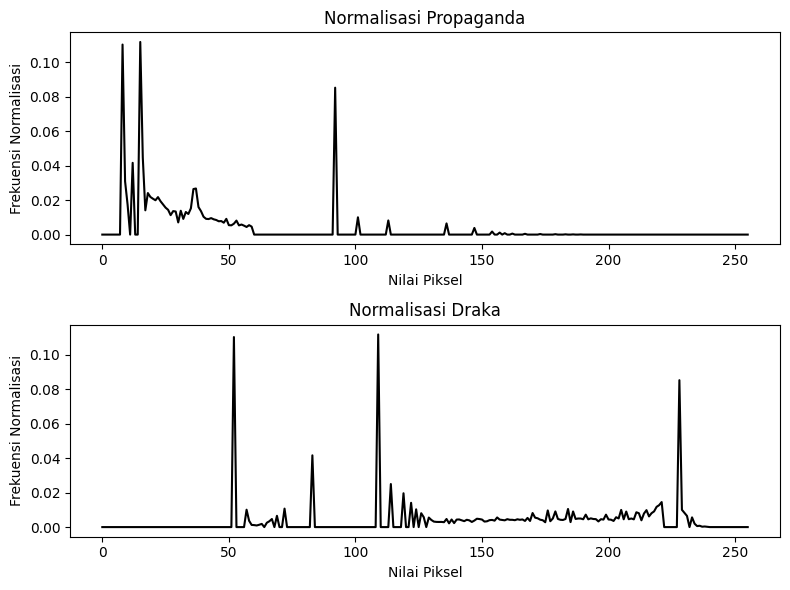

In [18]:
tabel_normalisasi(hasil_propaganda, hasil_draka)

In [14]:
def spesifikasi_bagian(img, indeks_urutan, indeks_propaganda):
    h, w = img.shape
    lebar = w // 6

    propaganda = cv2.imread('../Assets/propaganda.jpg', cv2.IMREAD_GRAYSCALE)
    draka = cv2.imread('../Assets/draka.jpg', cv2.IMREAD_GRAYSCALE)

    bagian = [0] * 6
    for i in range(6):
        bagian_baru = np.zeros((h, lebar), dtype=np.uint8)
        for j in range(h):
            for k in range(lebar):
                bagian_baru[j, k] = img[j, i * lebar + k]
        bagian[i] = bagian_baru

    for i in range(6):
        if i in indeks_propaganda:
            bagian[i] = spesifikasi(bagian[i], propaganda)
        else:
            bagian[i] = spesifikasi(bagian[i], draka)


    urutan = [0] * 6
    for i in range(6):
        indeks_asli = indeks_urutan[i]
        urutan[i] = bagian[indeks_asli]

    img_terurut = np.zeros((h, lebar * 6), dtype=np.uint8)
    for i in range(6):
        img_terurut[:, i * lebar:(i + 1) * lebar] = urutan[i]

    return img_terurut

code di atas adalah fungsi spesifikasi_bagian pertama-tama membagi gambar menjadi 6 bagian vertikal yang sama lebar. Kemudian, untuk setiap bagian, ia memeriksa apakah bagian tersebut harus disesuaikan dengan gambar propaganda atau draka berdasarkan indeks yang diberikan dalam indeks_propaganda. Bagian gambar yang sesuai dengan propaganda akan diproses menggunakan fungsi spesifikasi dengan gambar propaganda, sedangkan bagian lainnya akan diproses dengan gambar draka. Setelah itu, bagian-bagian ini disusun kembali sesuai dengan urutan yang ditentukan dalam indeks_urutan, dan hasil akhirnya adalah gambar yang terurut dengan distribusi intensitas yang disesuaikan sesuai dengan gambar target masing-masing.

code di bawah ini adalah fungsi spesifikasi_potongan membagi gambar menjadi 60 bagian kecil (10 baris dan 6 kolom). Setiap bagian diambil dan kemudian diproses. Jika bagian tersebut termasuk dalam daftar indeks_propaganda, maka bagian tersebut akan disesuaikan dengan gambar propaganda menggunakan fungsi spesifikasi. Jika tidak, bagian tersebut tetap seperti aslinya. Setelah semua bagian disesuaikan atau dipertahankan, fungsi akan menyusun bagian-bagian tersebut kembali sesuai dengan urutan yang ditentukan dalam indeks_urutan untuk membentuk gambar baru yang terurut.

In [15]:
def spesifikasi_potongan(img, indeks_urutan, indeks_propaganda):
    h, w = img.shape
    tinggi = h // 10
    lebar = w // 6

    propaganda = cv2.imread('../Assets/propaganda.jpg', cv2.IMREAD_GRAYSCALE)

    bagian = [0] * 60
    for baris in range(10):
        for kolom in range(6):
            index = baris * 6 + kolom
            bagian_baru = np.zeros((tinggi, lebar), dtype=np.uint8)
            for y in range(tinggi):
                for x in range(lebar):
                    bagian_baru[y, x] = img[baris * tinggi + y, kolom * lebar + x]

            if index in indeks_propaganda:
                bagian[index] = spesifikasi(bagian_baru, propaganda)
            else:
                bagian[index] = bagian_baru

    urutan = [0] * 60
    for i in range(60):
        indeks_asli = indeks_urutan[i]
        urutan[i] = bagian[indeks_asli]

    img_terurut = np.zeros((tinggi * 10, lebar * 6), dtype=np.uint8)
    for baris in range(10):
        for kolom in range(6):
            index = baris * 6 + kolom
            img_terurut[baris * tinggi:(baris + 1) * tinggi, kolom * lebar:(kolom + 1) * lebar] = urutan[index]

    return img_terurut

code di bawah ini pertama-tama mendefinisikan urutan bagian gambar (indeks_urutan) dan memilih gambar target (draka.jpg) serta gambar sumber (aktivis.jpg) dalam mode grayscale. Kemudian, gambar sumber dibagi menjadi bagian-bagian kecil dan disesuaikan dengan gambar target (draka.jpg) berdasarkan urutan yang telah ditentukan sebelumnya dengan spesifikasi_bagian. Selanjutnya, bagian-bagian yang telah disesuaikan tersebut diproses lagi dengan spesifikasi_potongan, di mana beberapa bagian gambar disesuaikan dengan gambar propaganda berdasarkan indeks yang diberikan. Hasil akhirnya adalah gambar yang telah diubah dan disesuaikan dengan distribusi intensitas yang diinginkan, kemudian ditampilkan.

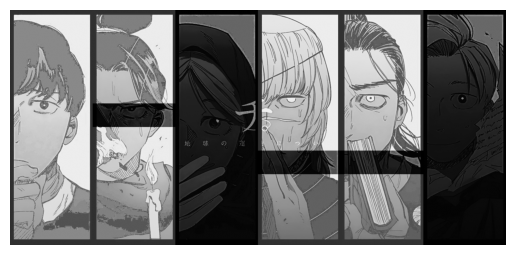

In [16]:
indeks_urutan = list(range(60))
target_img = cv2.imread('../Assets/draka.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('../Assets/aktivis.jpg', cv2.IMREAD_GRAYSCALE)

urutan_bagian = [1, 5, 3, 0, 4, 2]
indeks_propaganda_baru = [2, 3]

img_spesifikasi_bagian = spesifikasi_bagian(img, urutan_bagian, indeks_propaganda_baru)

indeks_propaganda = [25, 39, 40]
img_spesifikasi = spesifikasi_potongan(img_spesifikasi_bagian, indeks_urutan, indeks_propaganda)

plt.imshow(img_spesifikasi, cmap='gray')
plt.axis('off')
plt.show()

Dalam code di bawah ini, gambar aktivis.jpg dibaca dalam mode grayscale. Gambar ini kemudian dibagi menjadi 6 bagian dengan urutan tertentu yang ditentukan oleh urutan_bagian. Setelah itu, sebagian bagian gambar (ditentukan oleh indeks_propaganda_baru) disesuaikan menggunakan gambar propaganda dengan fungsi spesifikasi_bagian. Bagian lainnya tetap tidak berubah. Hasil akhirnya adalah gambar yang telah diproses dan disesuaikan, kemudian ditampilkan tanpa sumbu

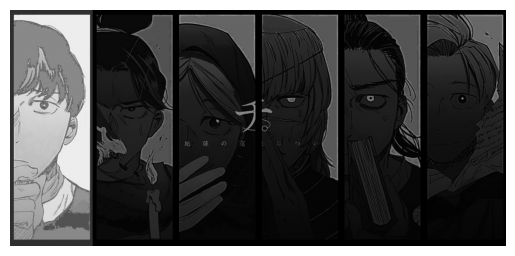

In [17]:
img = cv2.imread('../Assets/aktivis.jpg', cv2.IMREAD_GRAYSCALE)

urutan_bagian = [1, 5, 3, 0, 4, 2]
indeks_propaganda_baru = [0, 2, 3, 4, 5]

img_spesifikasi = spesifikasi_bagian(img, urutan_bagian, indeks_propaganda_baru)

plt.imshow(img_spesifikasi, cmap='gray')
plt.axis('off')
plt.show()